# ASOS Exploratory Data Analysis

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
all_data = pd.read_csv('asos.csv', na_values=['M'])

Data retrieved from: https://mesonet.agron.iastate.edu/request/download.phtml

station:
three or four character site identifier

valid:
timestamp of the observation

tmpf:
Air Temperature in Fahrenheit, typically @ 2 meters

dwpf:
Dew Point Temperature in Fahrenheit, typically @ 2 meters

relh:
Relative Humidity in %

drct:
Wind Direction in degrees from north

sknt:
Wind Speed in knots

p01i:
One hour precipitation for the period from the observation time to the time of the previous hourly precipitation reset. This varies slightly by site. Values are in inches. This value may or may not contain frozen precipitation melted by some device on the sensor or estimated by some other means. Unfortunately, we do not know of an authoritative database denoting which station has which sensor.

alti:
Pressure altimeter in inches

mslp:
Sea Level Pressure in millibar

vsby:
Visibility in miles

gust:
Wind Gust in knots

skyl1:
Sky Level 1 Altitude in feet

skyl2:
Sky Level 2 Altitude in feet

skyl3:
Sky Level 3 Altitude in feet

skyl4:
Sky Level 4 Altitude in feet

wxcodes:
Present Weather Codes (space seperated)

feel:
Apparent Temperature (Wind Chill or Heat Index) in Fahrenheit

ice_accretion_1hr:
Ice Accretion over 1 Hour (inches)

ice_accretion_3hr:
Ice Accretion over 3 Hours (inches)

ice_accretion_6hr:
Ice Accretion over 6 Hours (inches)

peak_wind_gust:
Peak Wind Gust (from PK WND METAR remark) (knots)

peak_wind_drct:
Peak Wind Gust Direction (from PK WND METAR remark) (deg)

peak_wind_time:
Peak Wind Gust Time (from PK WND METAR remark)

metar:
unprocessed reported observation in METAR format

In [49]:
df = all_data[['valid','drct', 'sknt', 'alti', 'vsby']].copy()
print(df.isnull().sum(axis = 0))
df.dropna()
df = df[df.vsby != 10]  # problem: over 300000 rows with visibility = 10 probs because any is over 10 was set as 10

valid        0
drct     13138
sknt      8276
alti       152
vsby      1195
dtype: int64


In [53]:
# Removing negative values from visibility
df['vsby'][df['vsby'] < 0] = 0
print(df.describe())
print(df.shape)

                drct           sknt           alti           vsby
count  111623.000000  112568.000000  115878.000000  114768.000000
mean      120.617435      11.364954      29.601726       4.723652
std       104.949439       6.989391       0.397854       2.606585
min         0.000000       0.000000      20.380000       0.000000
25%        50.000000       6.000000      29.330000       2.500000
50%        80.000000      11.000000      29.640000       4.000000
75%       150.000000      16.000000      29.900000       7.000000
max       360.000000      51.000000      30.680000       9.000000
(115963, 5)


C:\Users\Christopher Kok\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Distribution Plots & Heatmap

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020852E8E828>,
      dtype=object)

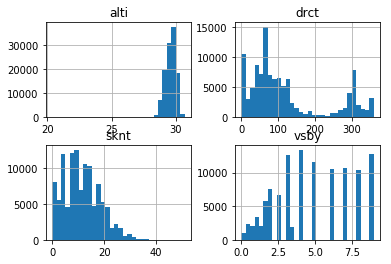

In [61]:
df.hist(bins=30)

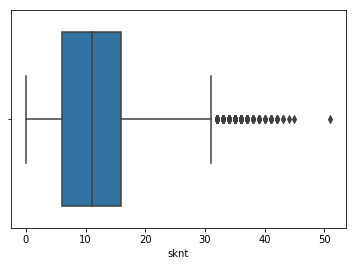

In [62]:
sns.boxplot(x=df['sknt'])

,drct,sknt,alti,vsby
drct,1.000000,-0.028300,-0.140194,0.134467
sknt,-0.028300,1.000000,-0.276365,-0.068810
alti,-0.140194,-0.276365,1.000000,-0.044350
vsby,0.134467,-0.068810,-0.044350,1.000000


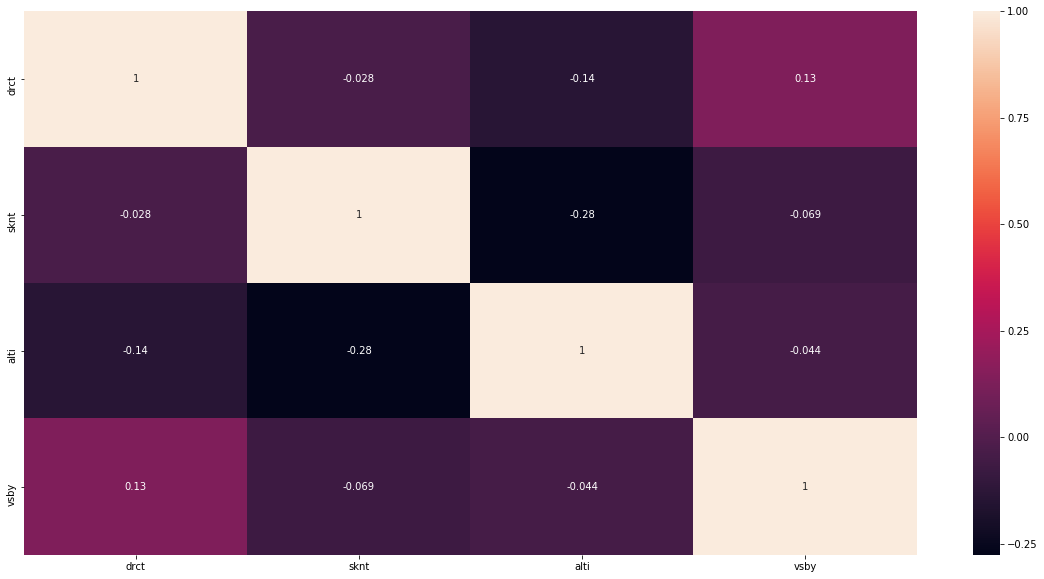

In [63]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,annot=True)
c